In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [ ]:
# reload(h_env)

# Normal Game Play

In [23]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [24]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [25]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for i in range(2000):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break
print(i+1)

219


Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [14]:
info, env.get_info_agent_two()

({'winner': -1,
  'reward_closeness_to_puck': -0.0005137054420094884,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -5.973502731323242e-06},
 {'winner': 1,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 5.973502731323242e-06})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [22]:
env.close()

# Train Shooting

In [8]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [9]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [10]:
env.close()

# Train DEFENDING

In [17]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_DEFENSE)

In [18]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

0.0
0.0
0.0
-0.0004170489439895703
-0.0003450360317303052
-0.000273251408832179
-0.0002022271408129527
-0.00013355273118485292
-7.462925628160701e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
10.0


In [19]:
env.close()

# Using discrete actions

In [ ]:
import random

In [ ]:
env = h_env.HockeyEnv(mode=h_env.Mode.TRAIN_SHOOTING)

In [ ]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Hand-crafted Opponent

In [56]:
env = h_env.HockeyEnv()

In [57]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [58]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(250000):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [43]:
np.mean(obs_buffer,axis=0)

array([-3.20231657, -0.21713611,  0.01434316,  0.0351155 , -0.15820857,
        0.13308649,  3.27581141,  0.2885733 ,  0.01020779, -0.03090971,
       -0.15688257,  0.04033451, -0.18029941, -0.11540616, -0.00103679,
       -0.27778939,  1.67330677,  0.83665339])

In [44]:
np.std(obs_buffer,axis=0)

array([ 0.4223928 ,  0.91799355,  0.665666  ,  3.25802592,  5.05098639,
        3.69745489,  0.26816468,  0.55843393,  0.14927681,  1.93131275,
        1.68347032,  0.81451887,  2.1749262 ,  1.74148514, 17.85563813,
       10.03494577,  4.01054941,  2.95672829])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [ ]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [45]:
import pylab as plt

In [ ]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

In [ ]:
plt.plot(obs_buffer[:,12])

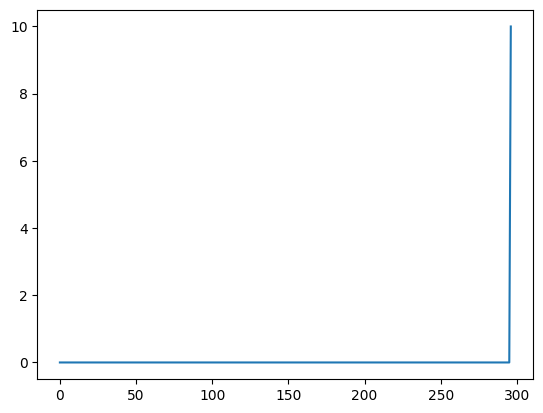

In [59]:
plt.plot(reward_buffer[:])

In [ ]:
np.sum(reward_buffer)

In [ ]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

In [55]:
env.close()

# Human Opponent

In [3]:
env = h_env.HockeyEnv()

In [4]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent(weak=False)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [83]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [5]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
#for _ in range(1000000):
for i in range(1, 100001):
    time.sleep(0.1)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d: break
print(f"Done after {i} steps.")

Done after 1319 steps.


In [6]:
env.close()

# Check side consistency

In [ ]:
env = h_env.HockeyEnv()

In [ ]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent(weak=False)

In [ ]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
for game in range(1000):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner_buffer.append(info["winner"])
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)

In [ ]:
obs_buffer.shape

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

In [ ]:
winner_buffer

In [ ]:
np.mean(winner_buffer,axis=0)

In [ ]:
np.std(winner_buffer,axis=0)

In [ ]:
np.sum(reward_buffer), np.sum(reward2_buffer)

In [ ]:
env.close()

# Human vs. SAC

In [12]:
from sac import SAC
import argparse

args = argparse.Namespace(
    env_name="Hockey",
    policy="Gaussian",
    gamma=0.99,
    tau=0.005,
    lr=0.0003,
    alpha=0.2,
    automatic_entropy_tuning=False,
    seed=123456,
    batch_size=128,
    max_episodes=10000,
    self_play=True,
    max_timesteps=2000,
    hidden_size=256,
    updates_per_step=1,
    start_steps=10000,
    target_update_interval=1,
    replay_size=1000000,
    replay_alpha=0.1,
    replay_beta=0.1,
    cuda=False
)

env = h_env.HockeyEnv()
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = SAC(env.observation_space.shape[0], env.action_space, args)

# IMPORTANT: CHOOSE PARAMETER FILE
player2.load_checkpoint(
    f"checkpoints/SAC_Hockey_3000-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed300.pth", evaluate=True)

Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space
cpu
Loading models from checkpoints/SAC_Hockey_3000-gamma0.99-tau0.005-lr0.0003-alpha0.2-autotuneTrue-pera0.1-perb0.1-seed300.pth


d:\Finn der Zocker\Documents\Programmieren\RL\Week 9\Gym-SAC\sac.py:152: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path)


In [13]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for i in range(1, 100001):
    time.sleep(0.1)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.select_action(obs_agent2, evaluate=False)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d: break
print(f"Done after {i} steps.")

Done after 593 steps.


In [14]:
env.close()